# 1st project

### Exploring US Flights Data

In this project, we are investigating the [Airline On-Time Performance Data](https://www.transtats.bts.gov/Tables.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data&DB_Short_Name=On-Time#).

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

### Data input
Firstly, we load the data from the csv file, we drop the last empty column (that exists because in the CSV file each line ends with a comma) and then we drop the rows that don't have any information about the delay of the flight, so as to not skew our statistics.

In [2]:
data_csv = '515364771_T_ONTIME_REPORTING.csv'
data = pd.read_csv(data_csv, parse_dates=['FL_DATE'])\
        .drop(['Unnamed: 19'], axis=1)\
        .dropna(subset=['DEP_DELAY'])

### Carrier names input

We use the [carrier lookup table](https://www.transtats.bts.gov/Download_Lookup.asp?Lookup=L_UNIQUE_CARRIERS) to change the `CARRIER` column from carrier codes, to carrier names, so we can understand the data better. The carrier codes are kept in a new column named `CARRIER_CODE`.

In [3]:
airline_data_csv = 'L_UNIQUE_CARRIERS.csv_'
airline_data = pd.read_csv(airline_data_csv, index_col = 'Code')

data = data.join(airline_data, on = 'CARRIER')\
        .rename(columns = {'CARRIER': 'CARRIER_CODE', 'Description': 'CARRIER'})

## Airport "misery index"

* We remove airports that have less flights than 99% of the airports in our dataset.
* We sort the airports in descending order of the probability that a flight departing from that airport has a delay.
* We show the average and median delay for each airport, sorted.
* Finally, we tabulate both the probability of experiencing a delay at a given airport, and the average and median delay. 


### Further data cleaning

In [4]:
grouped = data.groupby('ORIGIN')
treshold = grouped.size().quantile(0.01)
data_cleaned = grouped.filter(lambda x: len(x) > treshold)

### Probability calculation

We calculate the probability by measuring how many flights are delayed, for each airport, and dividing that by the total number of flights in that airport.

Note: We classify a flight as delayed, if it is delayed by more than 15'. Anything less that that is insignificant and can be covered during the flightime.

In [5]:
delayed = data_cleaned.loc[data_cleaned['DEP_DELAY'] > 15].groupby('ORIGIN')
grouped_cleaned = data_cleaned.groupby('ORIGIN')

prob = pd.DataFrame(delayed.size() / grouped_cleaned.size(),
                   columns = ['Probability'])

prob = prob.sort_values('Probability', ascending=False)
prob

,Probability
ORIGIN,
SCK,0.381916
HGR,0.347826
OTH,0.346369
OWB,0.345794
OGD,0.328000
...,...
ITO,0.055860
LBF,0.055160
WYS,0.046025


### Calculating average and median delay

In [6]:
mean_median_delay = pd.DataFrame()

mean_median_delay['Average delay'] = delayed.mean()['DEP_DELAY']
mean_median_delay['Median delay'] = delayed.median()['DEP_DELAY']

mean_median_delay = mean_median_delay.sort_values('Median delay', ascending=False)

mean_median_delay

,Average delay,Median delay
ORIGIN,,
EAR,133.500000,154.0
CGI,125.037500,105.0
PRC,108.433333,100.5
DVL,201.112676,83.0
ITH,137.934307,81.0
...,...,...
GUM,71.437500,29.0
OTZ,45.948718,29.0
WYS,56.454545,29.0


### Joining previous dataframes

In [7]:
prob.join(mean_median_delay)

,Probability,Average delay,Median delay
ORIGIN,,,
SCK,0.381916,61.579505,37.0
HGR,0.347826,78.229167,37.0
OTH,0.346369,95.104839,60.0
OWB,0.345794,85.675676,35.0
OGD,0.328000,57.048780,30.0
...,...,...,...
ITO,0.055860,49.674352,30.0
LBF,0.055160,93.096774,55.0
WYS,0.046025,56.454545,29.0


## Airline "misery index"

Similarly as above, we provide a ranking of the best airlines, so we know which to avoid next time we are in the US.

* Sorting the airlines in descending order of probability that a flight operated by the airline has a delay.
* Finding the average and median delay you may expect to have with an airline.
* Tabulating both the probability that you will experience a delay flying with a particular airline, and the average and median delay that you are likely to experience.

### Calculating probabilities for the airlines

Calculating the probability a carrier has a flight that is delayed (by more than 15'). We measure that by the overall departure delay, since that is the delay that concerns the passengers.

In [8]:
grouped_airlines = data.groupby('CARRIER')
delayed_airlines = data.loc[data['DEP_DELAY'] > 15].groupby('CARRIER') 

prob_airlines = pd.DataFrame(delayed_airlines.size() / grouped_airlines.size(),
                             columns = ['Probability']).sort_values('Probability', ascending=False)

prob_airlines

,Probability
CARRIER,
Frontier Airlines Inc.,0.285782
JetBlue Airways,0.261239
Southwest Airlines Co.,0.216033
Allegiant Air,0.207347
PSA Airlines Inc.,0.197586
ExpressJet Airlines LLC,0.181721
American Airlines Inc.,0.177732
Mesa Airlines Inc.,0.172546
Endeavor Air Inc.,0.172453


### Calculating the average and median delay for each carrier

In [9]:
mean_median_delay_airlines = pd.DataFrame(columns = ['Average delay', 'Median delay'])

mean_median_delay_airlines['Average delay'] = delayed_airlines.mean()['DEP_DELAY']
mean_median_delay_airlines['Median delay'] = delayed_airlines.median()['DEP_DELAY']

mean_median_delay_airlines.sort_values('Median delay', ascending=False)

,Average delay,Median delay
CARRIER,,
ExpressJet Airlines LLC,89.589492,55.0
SkyWest Airlines Inc.,86.672177,52.0
Mesa Airlines Inc.,81.476878,52.0
Endeavor Air Inc.,82.395787,51.0
United Air Lines Inc.,76.311576,49.0
Frontier Airlines Inc.,76.516077,49.0
Spirit Air Lines,79.783711,48.0
Republic Airline,70.714711,48.0
JetBlue Airways,71.087684,47.0


### Joining previous dataframes

In [10]:
prob_airlines.join(mean_median_delay_airlines)

,Probability,Average delay,Median delay
CARRIER,,,
Frontier Airlines Inc.,0.285782,76.516077,49.0
JetBlue Airways,0.261239,71.087684,47.0
Southwest Airlines Co.,0.216033,50.159974,34.0
Allegiant Air,0.207347,77.118105,44.0
PSA Airlines Inc.,0.197586,70.408650,46.0
ExpressJet Airlines LLC,0.181721,89.589492,55.0
American Airlines Inc.,0.177732,67.547502,43.0
Mesa Airlines Inc.,0.172546,81.476878,52.0
Endeavor Air Inc.,0.172453,82.395787,51.0


## Airport departures histogram

We plot a histogram that shows the distribution of departures from the airports in our dataset. The x-axis is bins containing flights and the y-axis is the number of airports with departing flights in each particular bin.

### Creating the histogram

We use a logarithmic scale to create the bins.

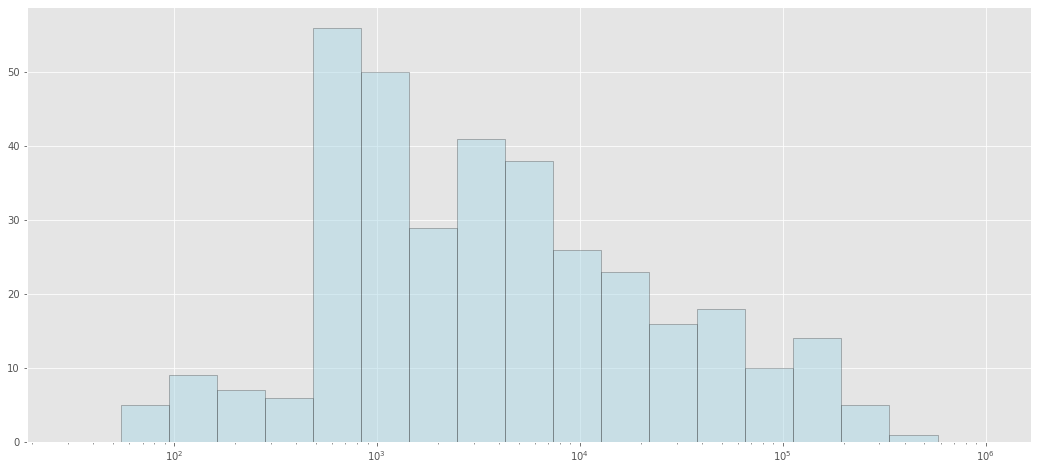

In [11]:
flight_numbers = grouped_cleaned.size()

plt.xscale('log')
flight_numbers.hist(bins=np.logspace(1.5, 6, 20), 
                        color='lightblue', edgecolor='black', 
                        alpha=0.5, figsize=(18, 8))

## Flight delays per month

Let us try to see how the number of delays changes throughout the year, by creating a plot that shows the number of flights and the number of delayed flights per month of year.

### Calculating delayed flights per month and plotting it

We group the data by month, find the delayed by month, then create a Dataframe that has two columns (one with the on-time flights and one with the delayed flights) and plot it.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

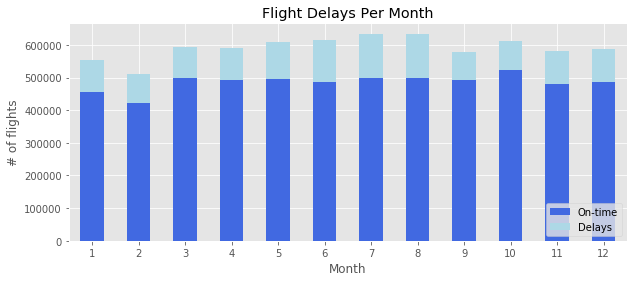

In [12]:
grouped_monthly = data_cleaned.groupby(data.FL_DATE.dt.month)

delayed_monthly = data_cleaned.loc[data['DEP_DELAY'] > 15].groupby(data.FL_DATE.dt.month)

total_delayed = pd.concat([(grouped_monthly.size() - delayed_monthly.size()).rename('On-time'),
           delayed_monthly.size().rename('Delays')], axis=1)

f = plt.figure()
total_delayed.plot(kind='bar', stacked=True, ax=f.gca(), color=('royalblue', 'lightblue'), figsize=(10,4))
plt.legend(loc='lower right')
plt.title('Flight Delays Per Month')
plt.xlabel('Month')
plt.ylabel('# of flights')
plt.xticks(rotation='horizontal')

## Best airline performance by departure and destination airports

We try to find out, for each possible departure-destination airports, which airline has the best performance track record, when it comes to mean departure delay. To quickly answer that question each time, we create a function.

### Finding best airline for every operating origin and destination combinations

We group the flights by origin, destination and carrier, find the mean delay, and sort the results.

We allow negative delays, to find the actual time the passenger will have to wait and not just the mean delay, in case that happens.

In [13]:
mean_delays = data_cleaned.groupby(['ORIGIN','DEST', 'CARRIER'])\
                .agg(['mean'])['DEP_DELAY'].rename(columns={'mean':'Mean Delay'})\
                .sort_values(by=['ORIGIN', 'DEST', 'Mean Delay'])

# if we want to keep the best airlines only, for each origin-destination pair:
# mean_delays = mean_delays.reset_index().groupby(['ORIGIN', 'DEST']).first()

def find_best(origin, dest):
    return mean_delays.loc[origin, dest]

mean_delays

# to find the best airline(s) for a given origin-destination pair:
# find_best('MSP', 'ORD')

# to find the number of operating airlines between two airports:
# mean_delays.reset_index().groupby(['ORIGIN','DEST']).size()

Mean Delay
ORIGIN DEST CARRIER                            
ABE    ATL  Delta Air Lines Inc.       7.530387
            ExpressJet Airlines LLC   10.433735
            Endeavor Air Inc.         11.991379
       CLT  PSA Airlines Inc.          5.063527
       DTW  SkyWest Airlines Inc.     15.946507
...                                         ...
XNA    TXK  ExpressJet Airlines LLC   38.000000
       VPS  Allegiant Air             11.733333
YAK    CDV  Alaska Airlines Inc.      -4.081921
       JNU  Alaska Airlines Inc.     -13.307263
YUM    PHX  SkyWest Airlines Inc.     -0.455669

[13041 rows x 1 columns]